In [3]:
import numpy as np
import pandas as pd
import sklearn
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import matplotlib.pyplot as plt
import functions

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Youri_Asnacios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Youri_Asnacios\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Youri_Asnacios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Youri_Asnacios\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
REGEX_SPECIAL_CHARACTERS = ['+', '-', '*', '|', '&', '[', ']', '(', ')', '{',
                '}', '^', '?', '.', '$', ',', ':', '=', '#', '!', '<',' ','"','\\','/',"'","%","~",'\n','>',';']

class Tokenizer:
        def __init__(self, separators):
                separators = ['\\'+sep if sep in REGEX_SPECIAL_CHARACTERS else sep for sep in separators]
                self._regex = '[' + ''.join(separators) + ']+'

        def tokenize(self, s):
                return [t for t in re.split(self._regex, s) if t != '']

# Data importation - Reviews.csv

In [2]:
import pandas as pd
df=pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Question 1 - Kmeans algorithm implementation

Testing the implementation of my_kmeans functions in a simple example

In [4]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0], [5,3], [7,8], [9,1], [0,4]])
centers,dico=functions.my_kmeans(X,2)

print(centers)
print(dico)

Epsilon value at iteration number 0 is 1.75.
Epsilon value at iteration number 1 is 0.0.

 The process finally required 2 iterations.

[array([0.75, 2.5 ]), array([8.5, 3. ])]
{0: [array([1, 2]), array([1, 4]), array([1, 0]), array([0, 4])], 1: [array([10,  2]), array([10,  4]), array([10,  0]), array([5, 3]), array([7, 8]), array([9, 1])]}


# Question 2 - Runing the algorithm on the food datas

#### Datas preprocessing

Before applying the previous function on our datas i needed to orgnaize and preprocess our datas. I wanted to apply clustering on products so I will iork through different steps :

- First of all we need to clear the text datas by using stop_words and stemming
- Then we need to groupby products and then retrieve all reviews from this product and concatenate those informations in one
- Preprocess the text datas to floating vectors
- Apply the clustering method on it

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### First of all i cleared the text datas by applying stop_words and stemming functions on the 'Text' column

In [ ]:
df['Text']=df['Text'].apply(functions.remove_stopwords)
df['Text']=df['Text'].apply(functions.stemming)

The preprocessing took a long time so i saved it in a csv file.

In [ ]:
df.to_csv('df_text_processed.csv', sep = '\t')

In [4]:
df_=pd.read_csv('df_text_processed.csv', sep = '\t')

print(df_['Text'][0])

I bought sever vital can dog food product found good qualiti . the product look like stew process meat smell better . My labrador finicki appreci product better .


As it is ask in the homework, we have to groupby productId and apply the tfidf on the concatenation of all texts from the same productID.

The groupby we need to compute is the groupby as following (we keep the text in order to make things clearer).

In [5]:
gp = df_.groupby('ProductId', as_index = False).agg({'Text': ' '.join})

I applied sequentially tfidf_vectorizer (in order to vectorize the datas) and svd_reduction (in order to reduce tfidf vector dimensions).

In [6]:
X = functions.tfidf_vectorizer(gp)
X_= functions.svd_reduction(X)

In [10]:
clust_centers,dic=functions.my_kmeans(X_,10)

ValueError: operands could not be broadcast together with shapes (10,100) (10,2) 

#### Here i got an error with my clustering function despite looking for the error that looks easy i couldn't find a way to deal with it.
In consequences, the rest of the study is based on sklearn Kmeans algorithm.

For the number of clusters in my clustering i looked for the clustering that gave me the lowest cumulatve interclass inertia and the largest intraclass inertia over all clusters. I tested 6, 8, 9, 10, 11 and 12. I found 10 was the best.

In [7]:
kmeans = KMeans(10).fit(X_)

In [8]:
gp['cluster']=kmeans.labels_

In [9]:
gp

,ProductId,Text,cluster
0,0006641040,"these day , person say , `` chicken soup `` 'r...",4
1,141278509X,thi product archer farm best drink mix ever . ...,5
2,2734888454,"My dog love chicken product china , wont buy a...",3
3,2841233731,thi book easi read ingredi avail store unlik r...,5
4,7310172001,thi product health snack pup made 100 % beef l...,3
...,...,...,...
74253,B009UOFTUI,"thi coffe supposedli premium , tast wateri -- ...",5
74254,B009UOFU20,"thi coffe supposedli premium , tast wateri -- ...",5
74255,B009UUS05I,the basket perfect sympathi gift tri express m...,5
74256,B009WSNWC4,purchas product local store NY kid love . it q...,5


Then i used 'merge' function (precising  the key 'productId') to join new information from the clustering to the full dataset.

In [10]:
cluster = gp.set_index('ProductId')['cluster']
final_df = df_.merge(cluster, on='ProductId', how='left')

In [11]:
final_df

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cluster
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I bought sever vital can dog food product foun...,5
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arriv label jumbo salt peanut ... pean...,5
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","thi confect around centuri . It light , pillow...",5
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If look secret ingredi robitussin I believ I f...,5
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffi great price . there wide assort yu...,6
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesam chicken .. good better restur I ea...,4
568450,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I 'm disappoint flavor . the chocol note espec...,5
568451,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"these star small , give 10-15 one train sessio...",3
568452,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,these best treat train reward dog good groom ....,3


Then i created a function to clean the text again. I created a clean function that should tackle on issues due to non-alphanumeric characters (with regex call int the Tokenizer i used) and also with the problem of redundant nonsense words. I created a sort list of words that WordCloud algorithm returned me after the first iteration (nonsense word like 'it', 'br', 'great', 'flavor', ...) in order to force the algorithm to focus on more interesting words.

In [25]:
tokenizer=Tokenizer(REGEX_SPECIAL_CHARACTERS)
with open("stop_list.txt", "r") as fichier:
    stop_list=tokenizer.tokenize(fichier.read())

print(stop_list)

['i', 'me', 'we', 'our', 'ours', 'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'they', 'them', 'their', 'theirs', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'don', 't', 'should', 'should', 've', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'are', 'does', 'br', 'food', 'like', 'tast', 'love', 'food', 'one', 'flavour', 'product

In the following cell i try my best for plotting WordCloud representation, by ordering by 'Cluster'.

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


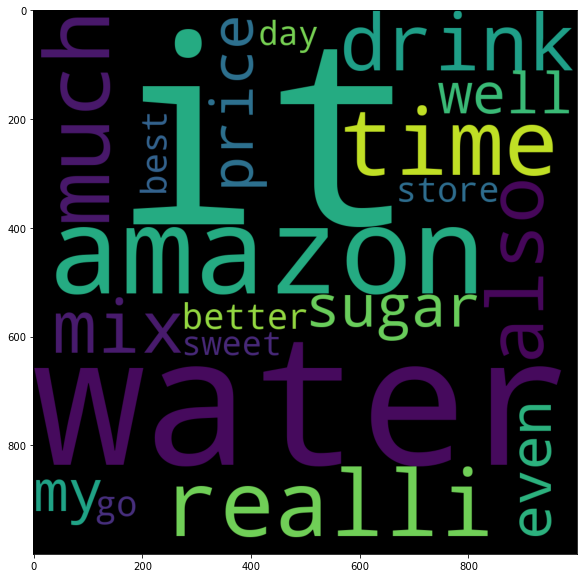

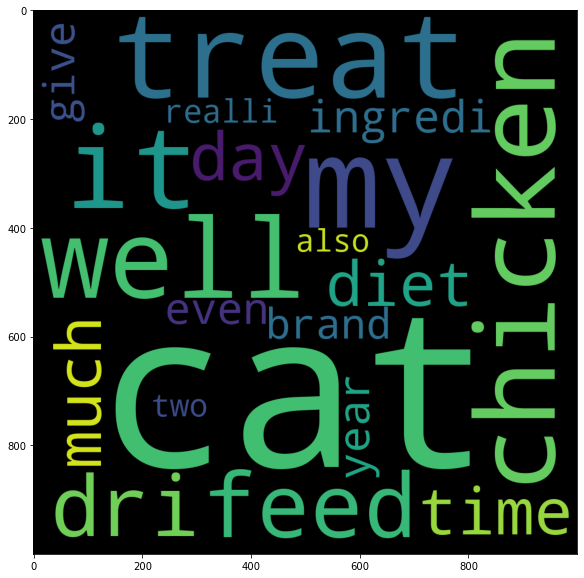

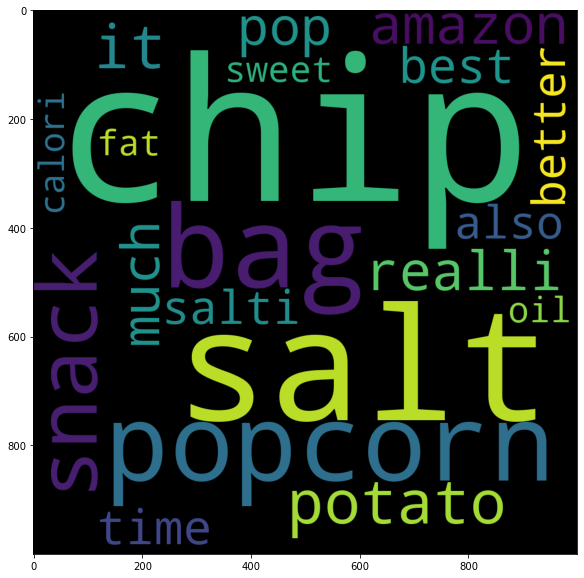

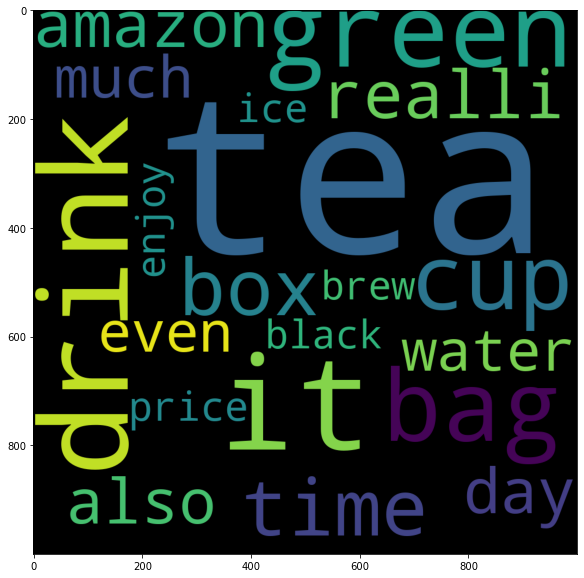

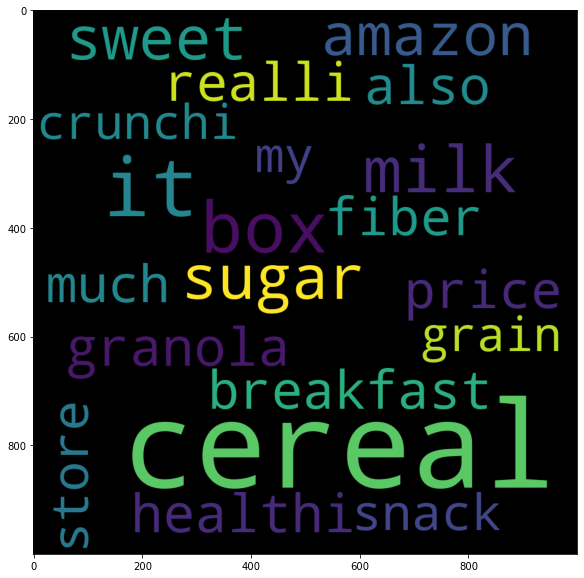

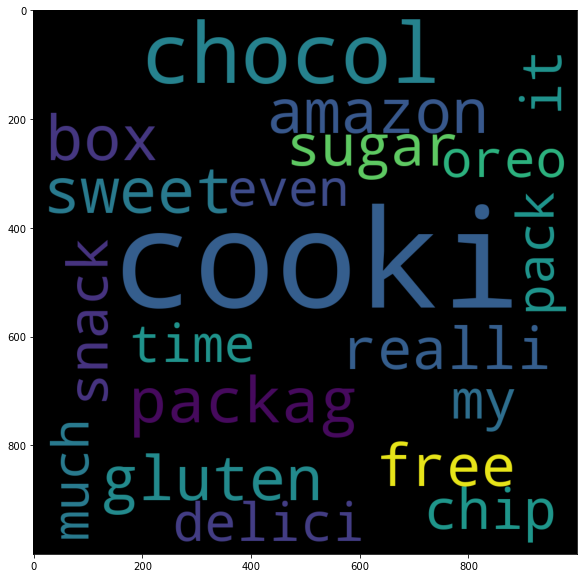

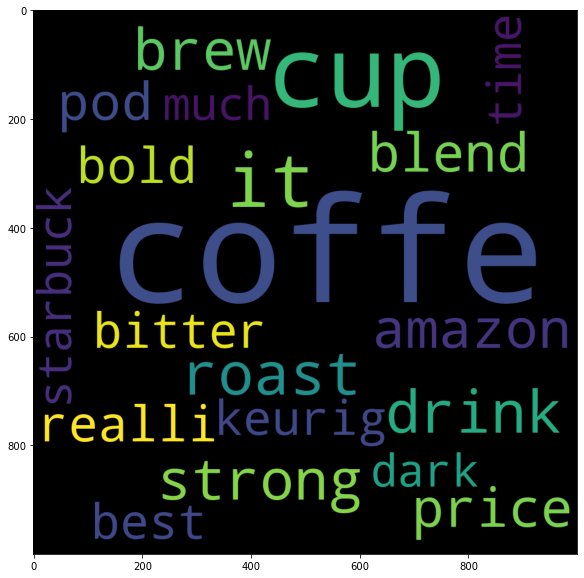

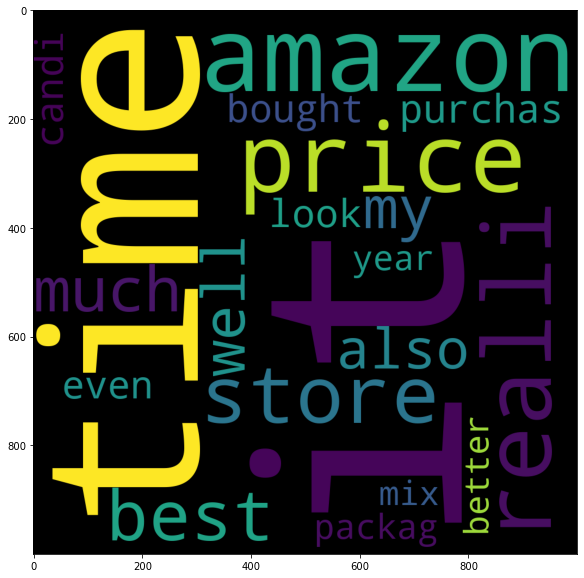

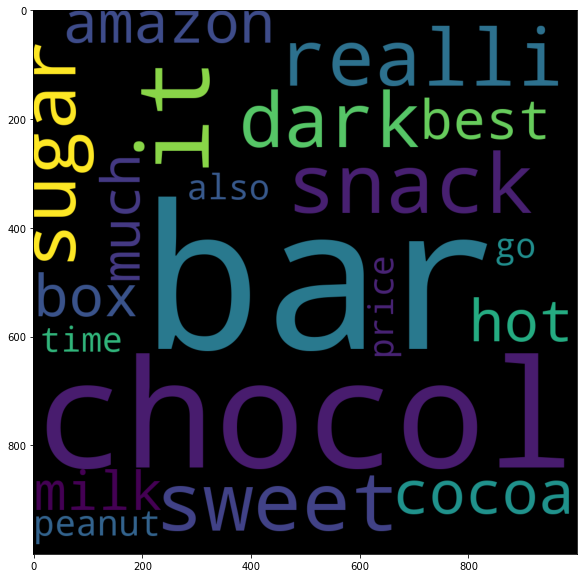

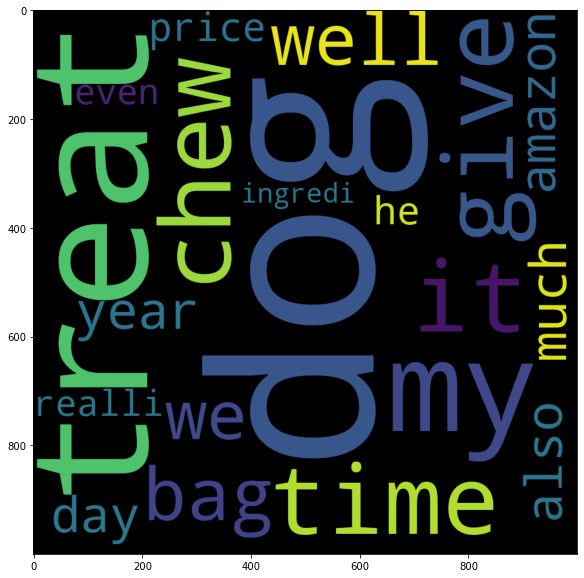

In [27]:
cluster_text = final_df.groupby('cluster').agg({'Text': ' '.join}) #groupby Cluster in order to have the vizualisation for 
for i in cluster_text.index:                                         #each cluster
    txt = cluster_text.loc[i].Text
    txt= functions.clean(txt, stop_list)
    print('ok')
    
    cv = CountVectorizer(max_features=200) #using CountVectorizer to keep 200 tokens from the all combined text
    counts = cv.fit_transform([txt]).toarray().ravel()
    words=np.array(cv.get_feature_names())
    
    top_word = np.array(words)[np.argsort(counts)[-20:]].tolist()  #Keeping 20 most high frequencies tokens in each CountVcetorizer
    top_count = counts[np.argsort(counts)[-20:]].tolist()          #results.
    word_freq= dict(zip(top_word, top_count)) 
    
    plt.figure(figsize=(10,10)) # plotting WordCloud thanks to this tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python
    wc = WordCloud(width=1000,height=1000).generate_from_frequencies(word_freq)
    plt.imshow(wc)

Something strange appeared in the results : 'it' was still there even if i added 'it' in my stop-list. Same note for 'also' and 'we'.

### Sub question : Provide the number of product in each cluster

<BarContainer object of 10 artists>

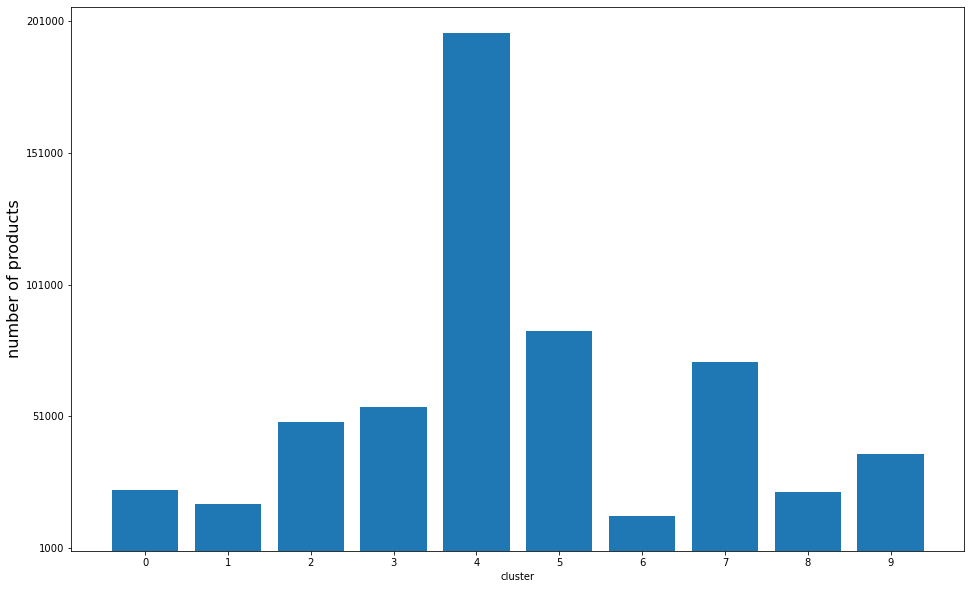

In [18]:
cluster_size = final_df.groupby('cluster').size()
plt.figure(figsize=(16,10))
plt.xticks(cluster_size.index)
plt.yticks(range(1000, 500000, 50000))
plt.xlabel('cluster')
plt.ylabel('number of products', size=16)
plt.bar(cluster_size.index, cluster_size)

### Sub question : Compute the reviews' score distribution in each cluster. Once you get them, test if their mean differences are statistically significant!

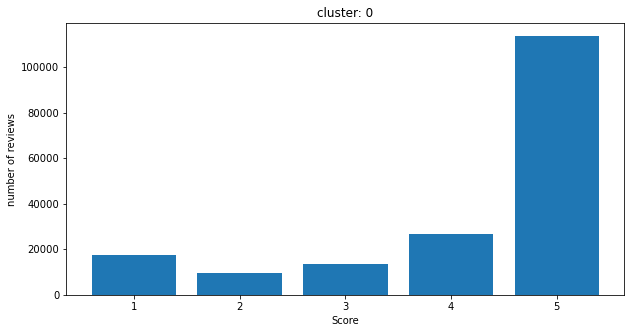

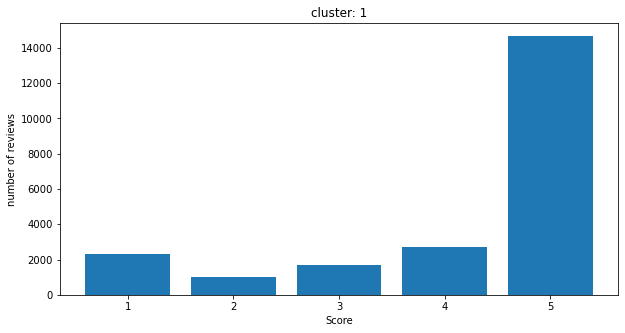

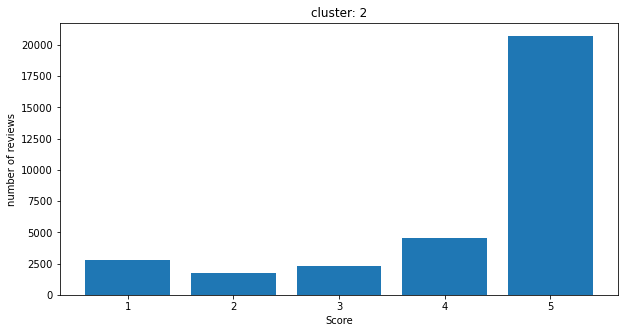

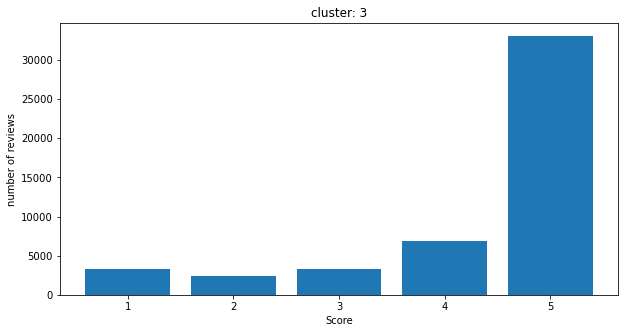

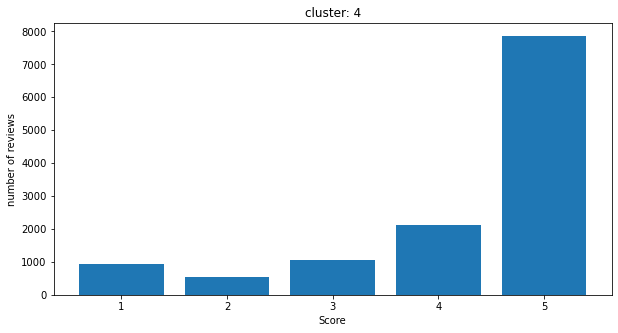

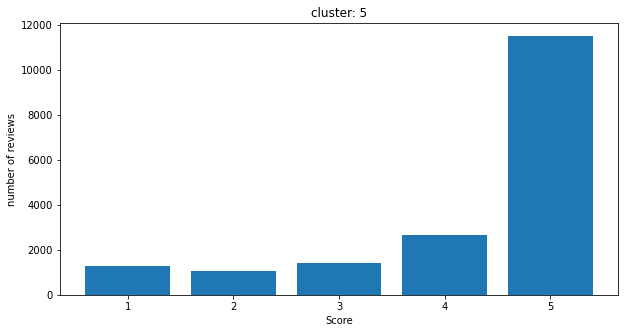

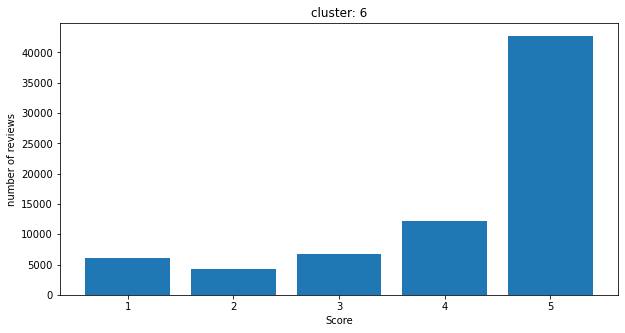

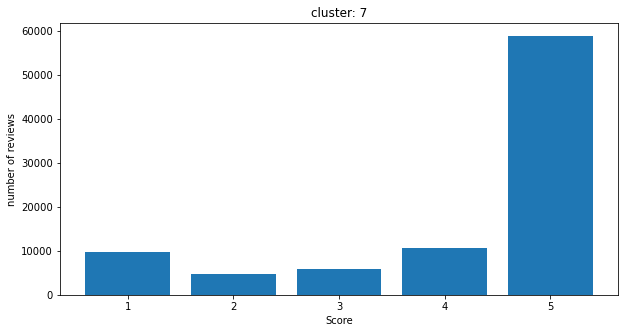

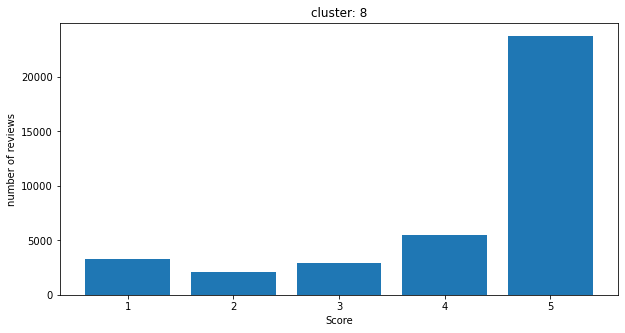

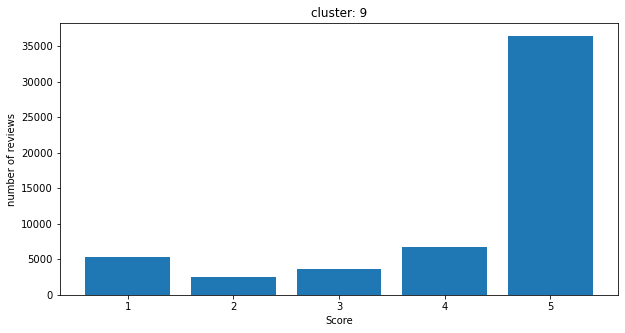

In [29]:
for cluster in range(10):
    fig = plt.figure(figsize=(10,5))
    plt.title('cluster: '+str(cluster))
    plt.bar(np.arange(5)+1, final_df[final_df.cluster == cluster].groupby('Score').size())
    plt.xlabel('Score')
    plt.ylabel('number of reviews')
    plt.show()

### Sub question : Get the number of unique users writing reviews in each cluster

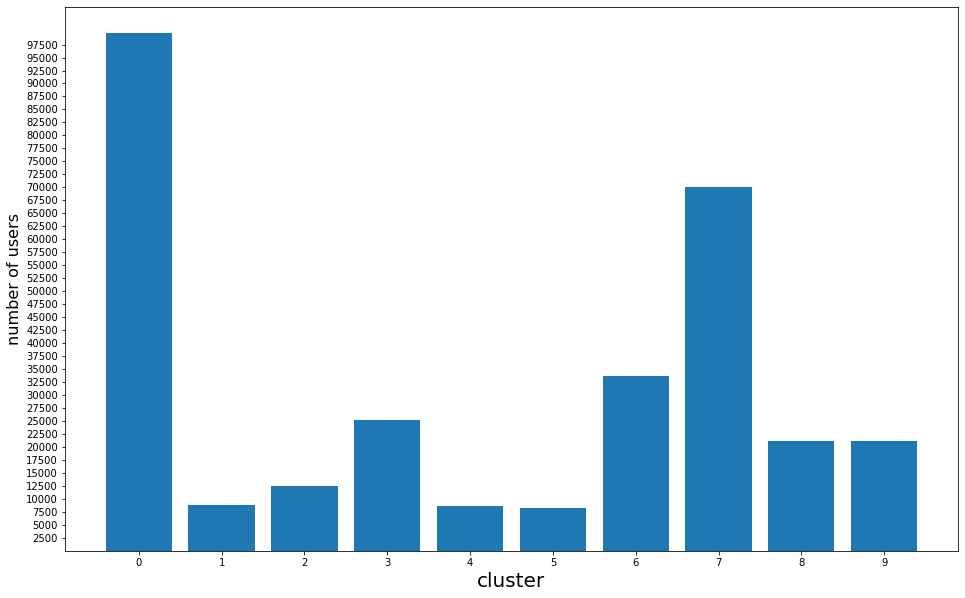

In [30]:
user_count = final_df.groupby('cluster').UserId.nunique()
plt.figure(figsize=(16,10))
plt.xticks(user_count.index)
plt.yticks(range(2500, 100000, 2500))
plt.xlabel('cluster', size=20)
plt.ylabel('number of users', size=16)
plt.bar(user_count.index, user_count);

# Algorithmic question

I try something for this question but not sure about the complexity result. Because i made r loop and n tests in the if statement. So i don't know if we can saw that final complexity of the algorithm is O(n+r) or O(nr).

In [21]:
#let A an array such that :
#A.shape[0]
#>>> n

def sort(A):
#initialisation
    s = min(A)
    b = max(A)
    r = int(b - s)

    #Sort loop
    tab = []
    for i in range(s, b):  # We loop r times because the range contains r elements
        if i in A:  # We enter n times because the if statement 'in A' is equivalent to test along A.shape[0]
            tab.append(i)

    return tab

At the end of the algorithm, we loop over r then over n. So i think that the complexity is O(n+r).

In [22]:
A=np.array([1,6,8,3,0,45,87,23,2])
S=sort(A)

print(S)

[0, 1, 2, 3, 6, 8, 23, 45]
